 # Que-4, a_part

### Importing the required libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.datasets.samples_generator import make_swiss_roll


### PCA

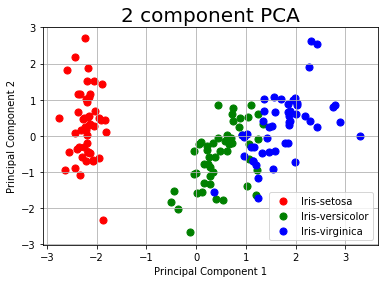

In [6]:
data = pd.read_csv ('iris.data', delimiter=",",header=None)
data.columns=['par_1','par_2','par_3','par_4','label']
# normalisation of data
X=data[['par_1','par_2','par_3','par_4']]
normalized_df=(X-X.mean())/X.std()
#applying pca on normalised dataframe
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = data['label'] == target
    plt.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
plt.legend(targets)
plt.grid()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA', fontsize = 20)
plt.savefig('iris_pca')

# Que-4, b_part

## TSNE

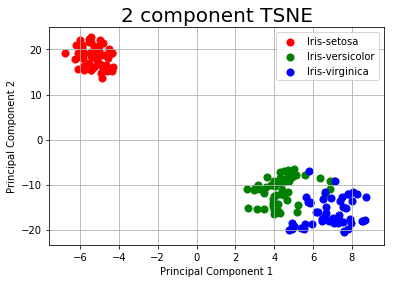

In [7]:
X_embedded = TSNE(n_components=2).fit_transform(normalized_df)
X_embedded= pd.DataFrame(data = X_embedded , columns = ['principal component 1', 'principal component 2'])
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = data['label'] == target
    plt.scatter(X_embedded.loc[indicesToKeep, 'principal component 1'] , X_embedded.loc[indicesToKeep, 'principal component 2'] , c = color, s = 50)
plt.legend(targets)
plt.grid()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component TSNE', fontsize = 20)
plt.savefig('iris_tsne')

# Que-4 , c_part

## Swiss roll dataset

/home/sneha/miniconda3/lib/python2.7/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


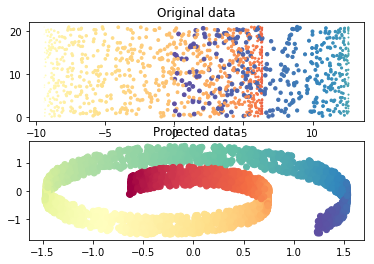

In [8]:
#Applying pca
X, color = make_swiss_roll(n_samples=2500)
normalized_X=(X-X.mean())/X.std()
normalized_X                                        
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(normalized_X)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])
principalDf = np.array(principalDf)
fig = plt.figure()

ax = fig.add_subplot(211)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(212)
ax.scatter(principalDf[:, 0], principalDf[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
# plt.xticks([]), plt.yticks([])
plt.title('Projected data')
plt.savefig('swiss_roll_pca')
plt.show()


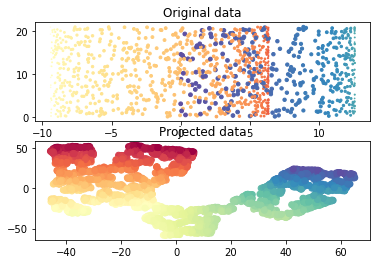

In [9]:
# Applying TSNE
normalized_X=(X-X.mean())/X.std()
normalized_X                                        
principalComponents = TSNE(n_components=2).fit_transform(normalized_X)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])
principalDf = np.array(principalDf)
fig = plt.figure()
ax = fig.add_subplot(211)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original data")
ax = fig.add_subplot(212)
ax.scatter(principalDf[:, 0], principalDf[:, 1], c=color, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.title('Projected data')
plt.savefig('swiss_roll_tsne')
plt.show()